# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
#from copy import deepcopy

In [3]:
from shl_scripts.shl_experiments import SHL_set
tag = 'EXP'
experiments = SHL_set({})

In [10]:
%%writefile {experiments.shl.cache_dir}/{tag}.py

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

tag = 'EXP'
list_figures = ['show_dico']
list_figures = []

display_variables = ['error', 'logL', 'cputime']
display_variables = ['error', 'logL', 'qerror', 'aerror', 'MI', 'cputime']
display_variables = ['error', 'logL', 'perror', 'MC', 'cputime']

variables = ['eta']
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']


try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'

from shl_scripts.shl_experiments import SHL_set
opts = dict(homeo_method=tag, verbose=0)
experiments = SHL_set(opts, tag=tag)

if command == 'run':
    for variable in variables:
        experiments.scan(variable=variable, list_figures=[], display='')

if command == 'plot':
    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='dynamic')
    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='final')
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable='eta', list_figures=list_figures, display='')

        for display_variable in display_variables:
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print(display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting cache_dir/EXP.py


In [5]:
!ls -ltr {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff  1629 Sep  7 15:00 cache_dir/EXP.py


## Homeostasis à-la-SparseNet on the activation probability

In [6]:
%run {experiments.shl.cache_dir}/{tag}.py run

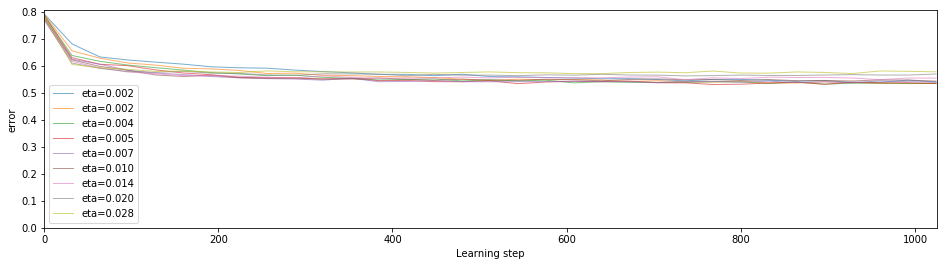

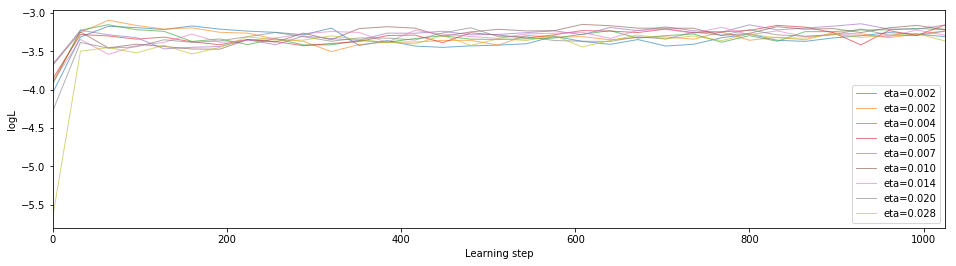

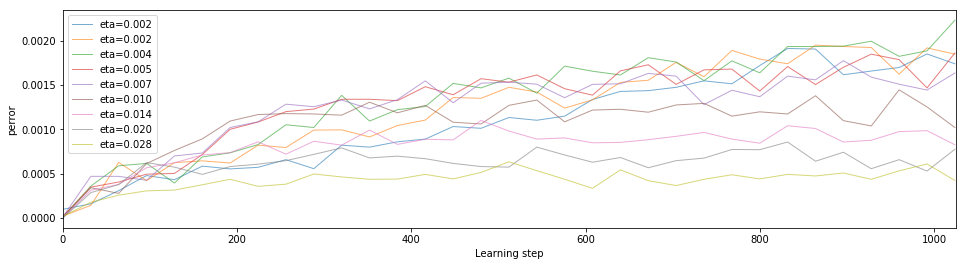

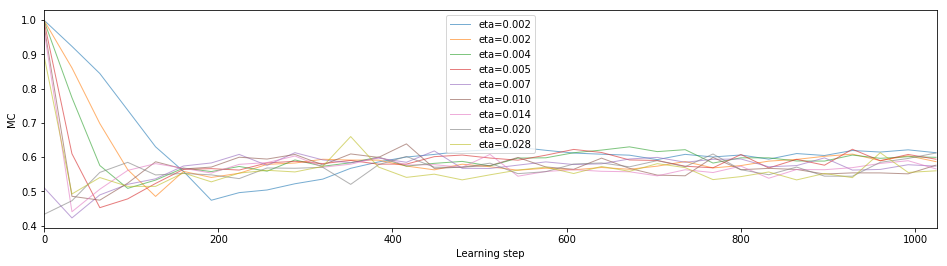

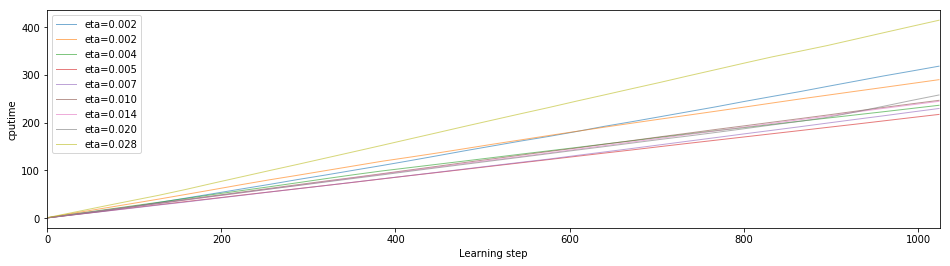

error


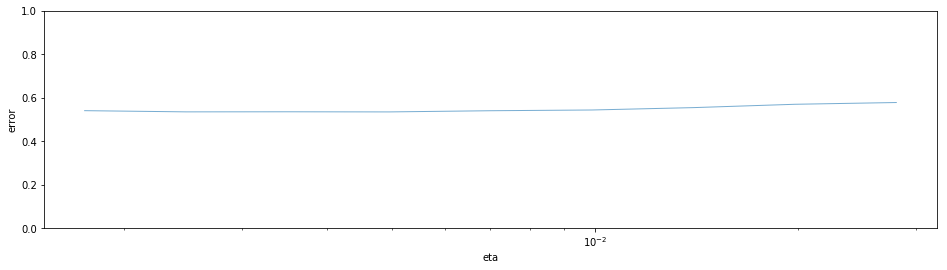

logL


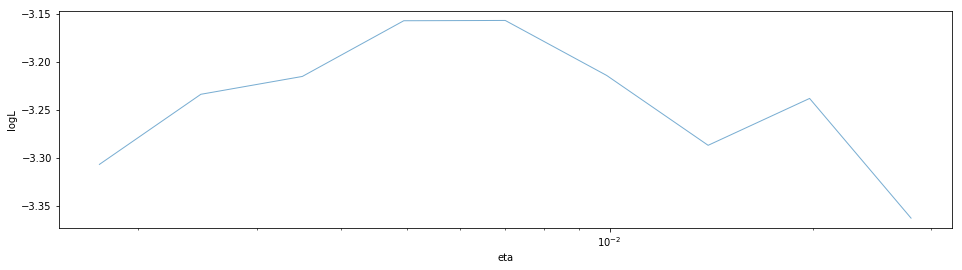

perror


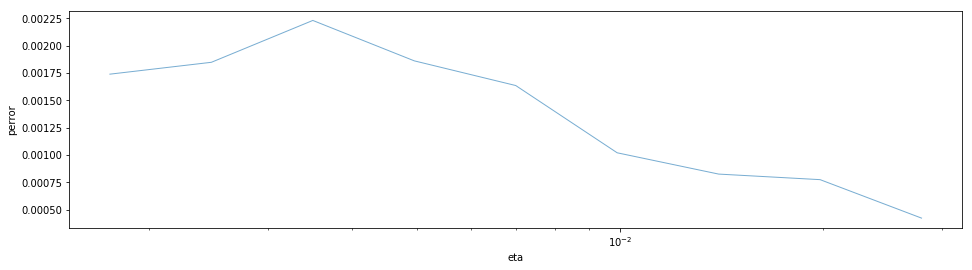

MC


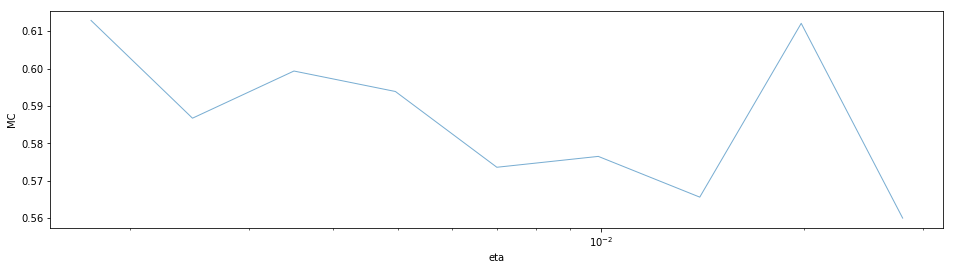

cputime


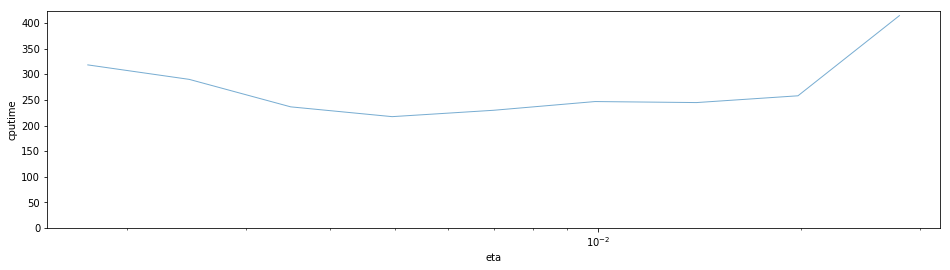

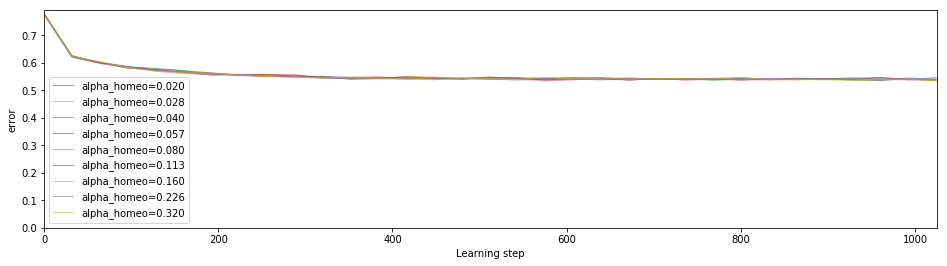

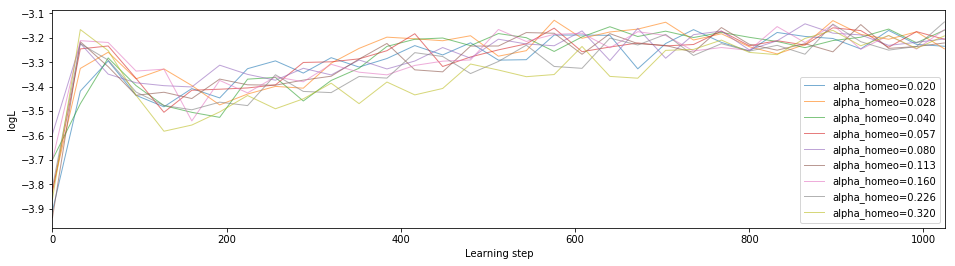

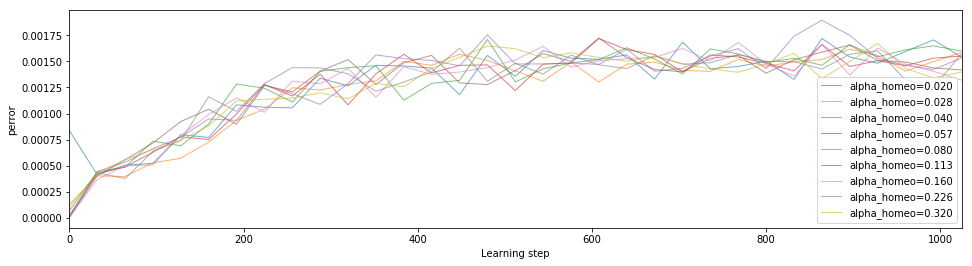

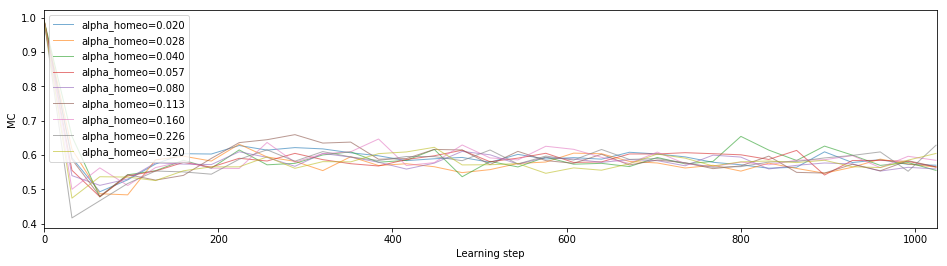

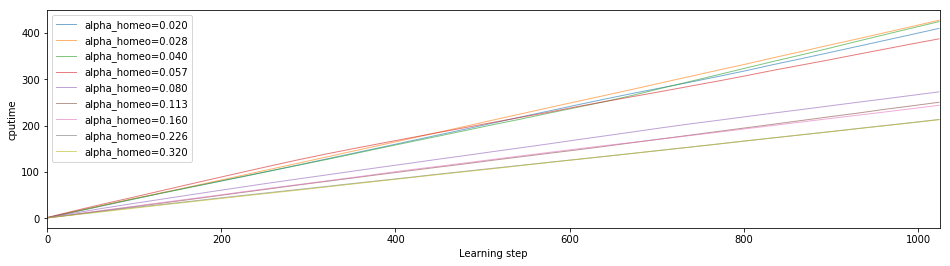

error


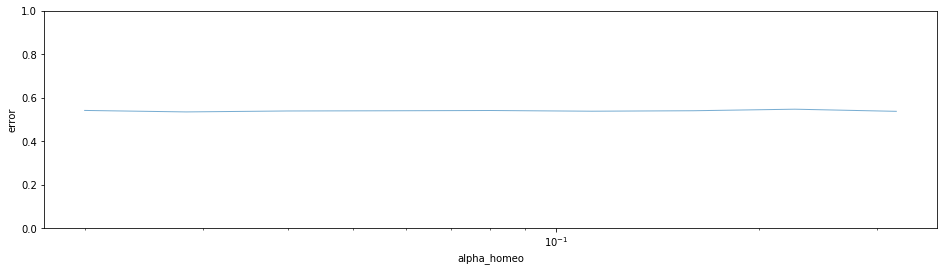

logL


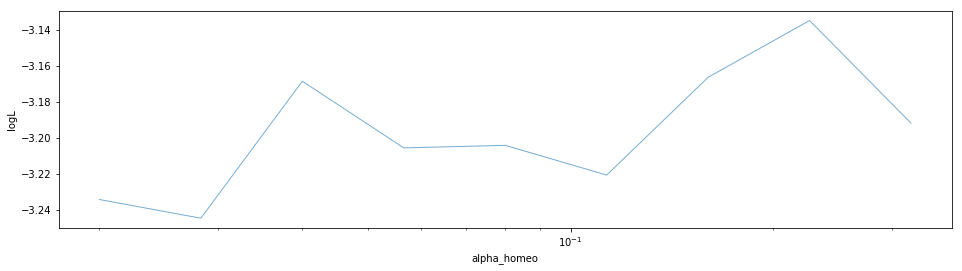

perror


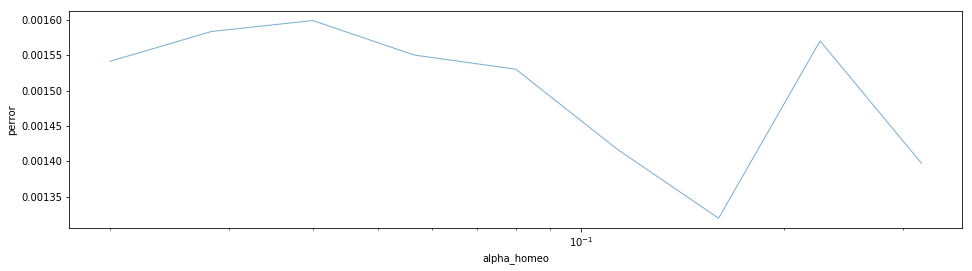

MC


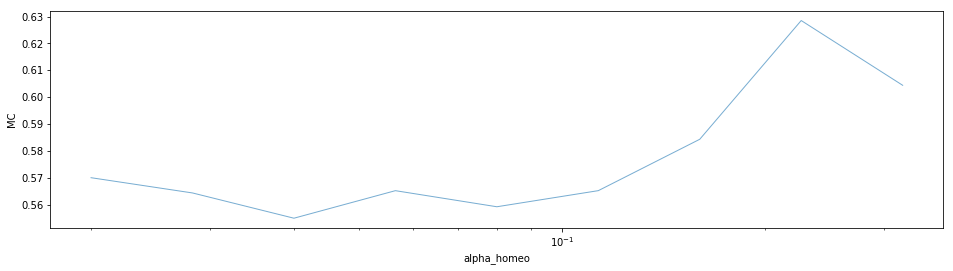

cputime


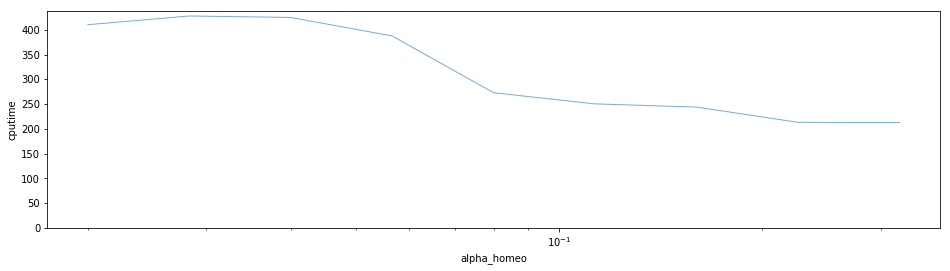

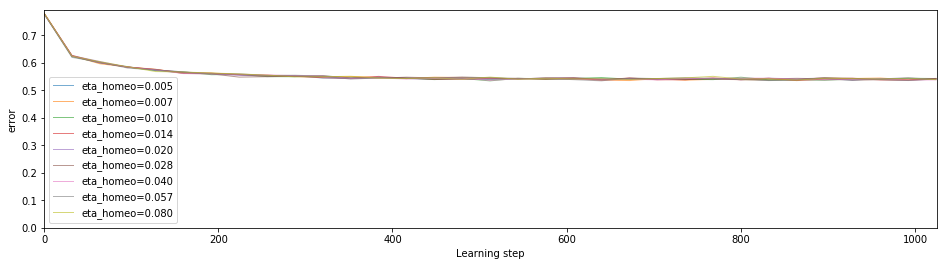

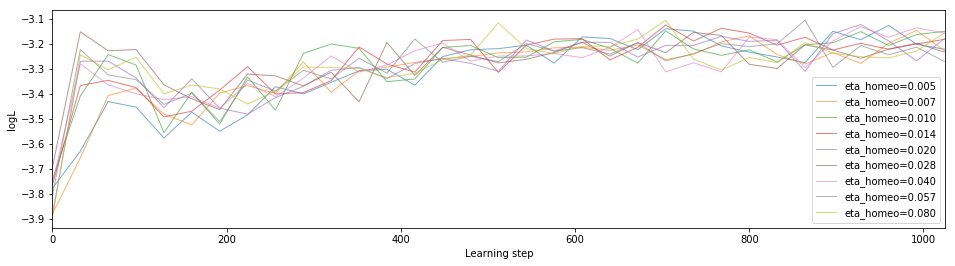

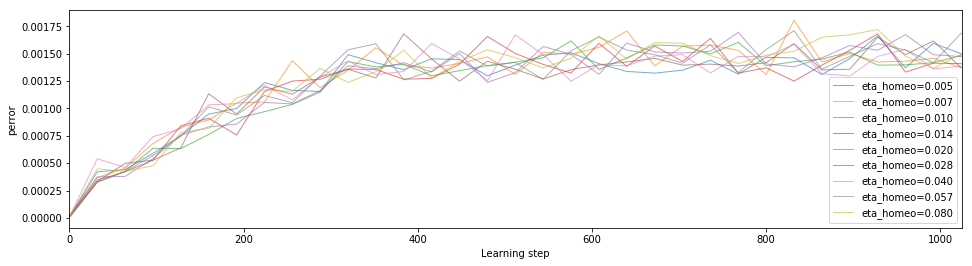

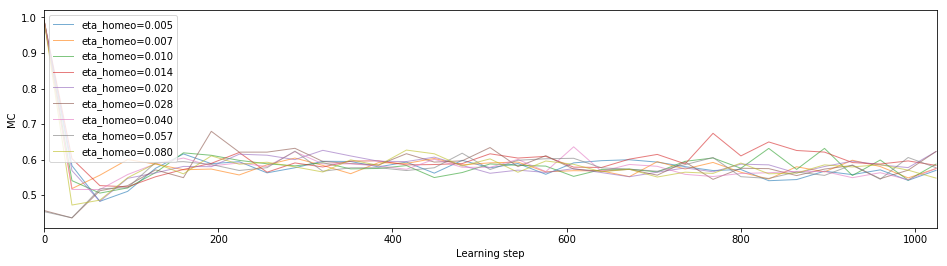

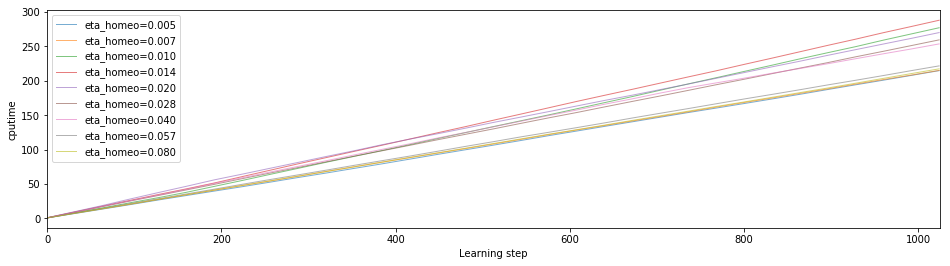

error


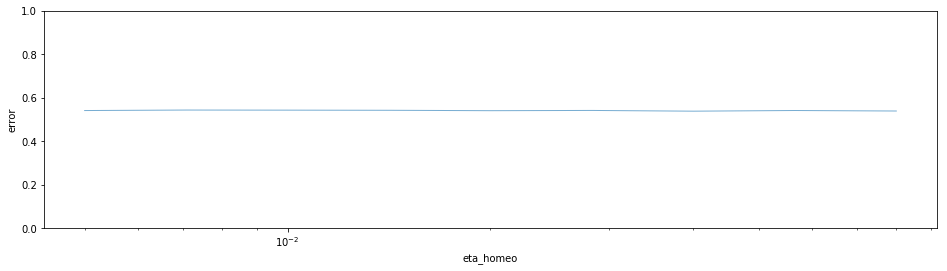

logL


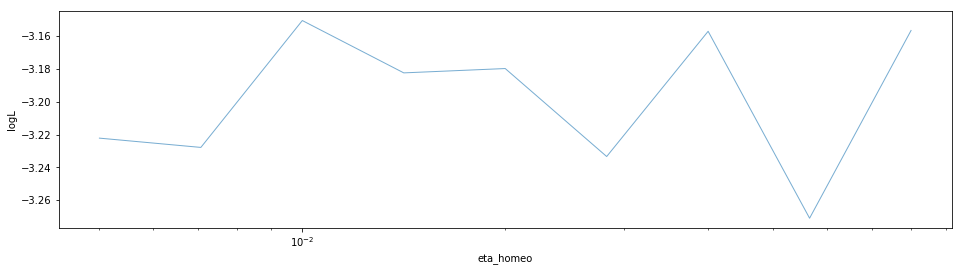

perror


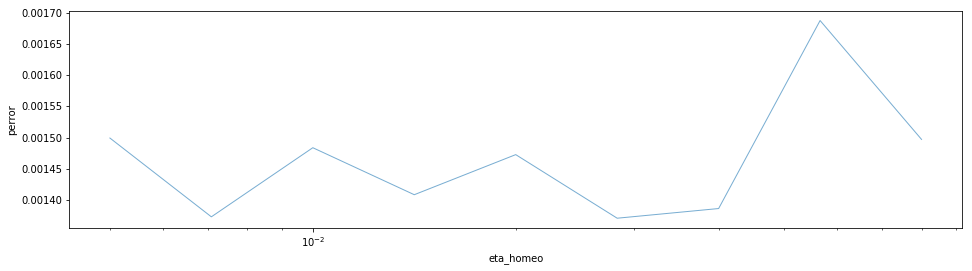

MC


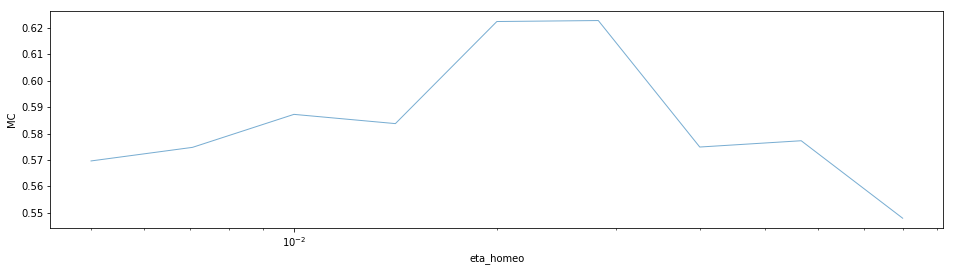

cputime


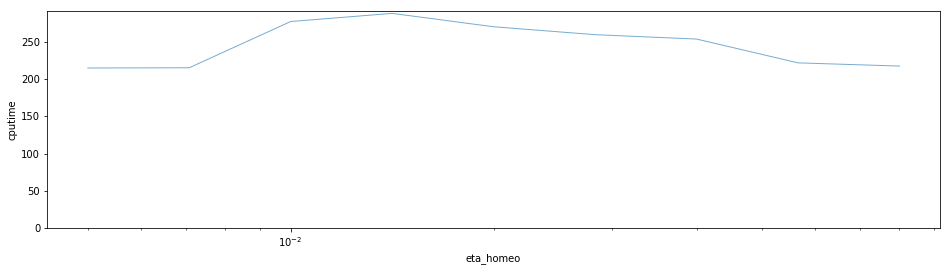

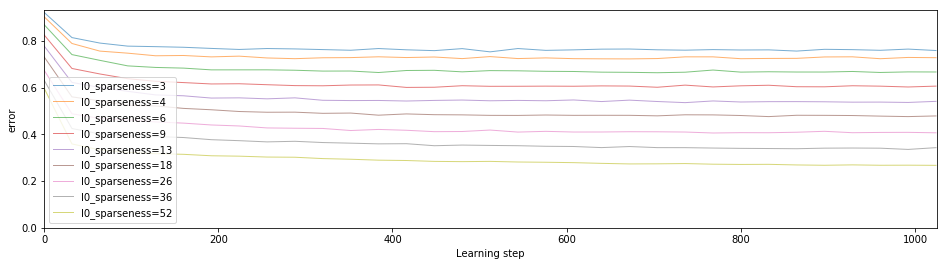

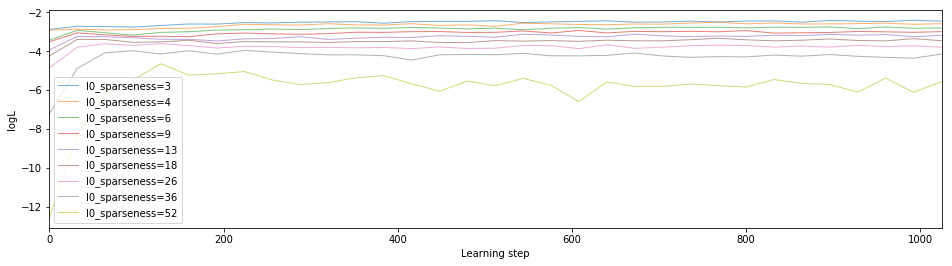

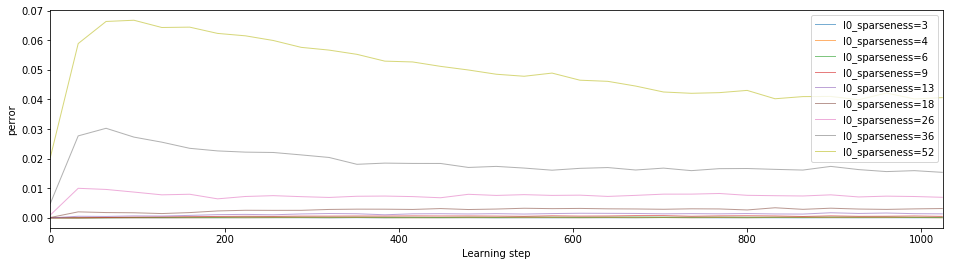

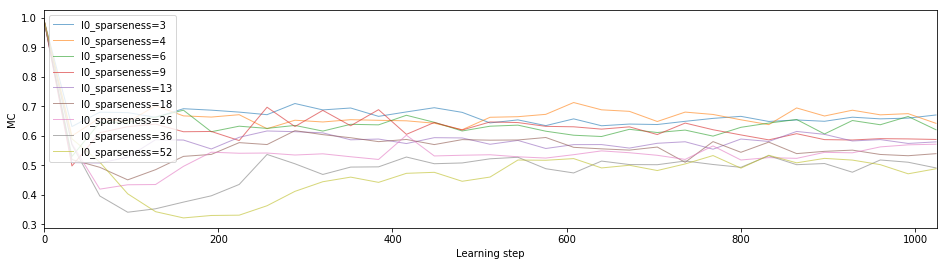

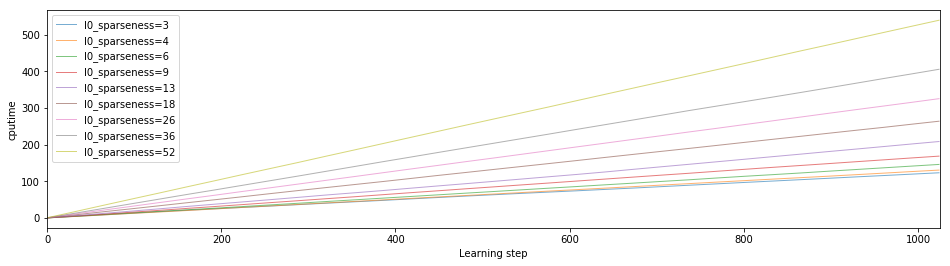

error


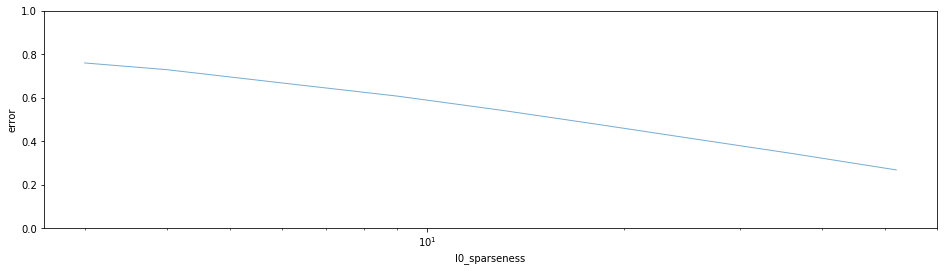

logL


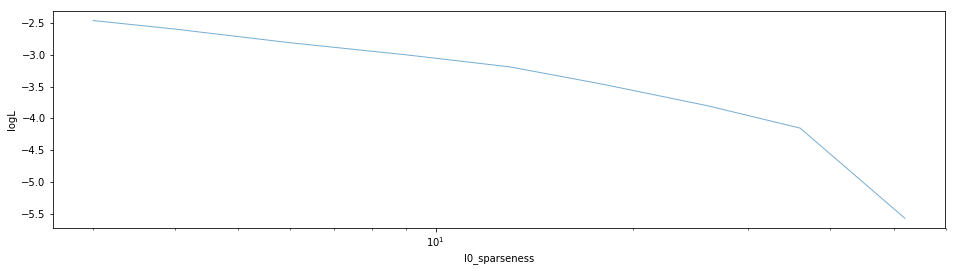

perror


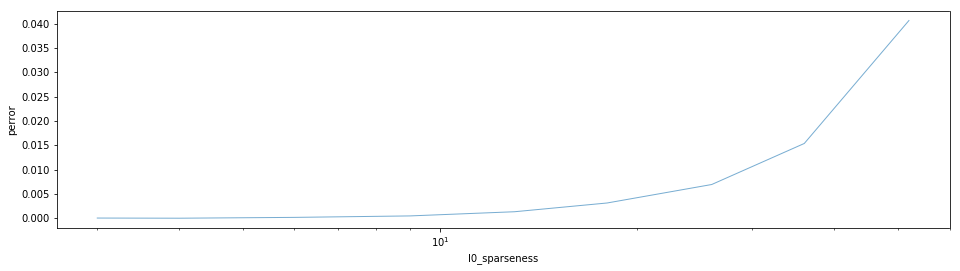

MC


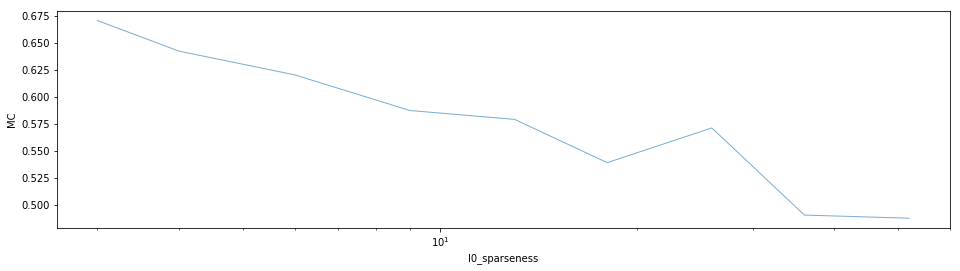

cputime


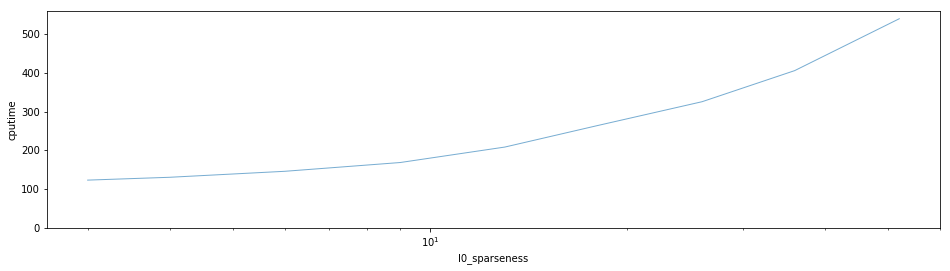

In [11]:
%run {experiments.shl.cache_dir}/{tag}.py plot

## Version used

In [8]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
Fri Sep 07 17:46:30 2018 CEST